# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [3]:
path = r'/Users/spathak/Instacart_Basket_Analysis'

In [4]:
#Importing Instacart_Basket_merged.pkl dataframe

df_merge = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data','Instacart_Basket_merged.pkl'))

In [5]:
# Import  data set departments.csv

df_dep_t_new = pd.read_csv(os.path.join(path, '02-Data','Prepared-Data', 'departments_wrangled.csv'),index_col=False)


In [119]:
# Info of department dataframe
df_dep_t_new.head(30)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# Info of df_merge dataframe
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30564243 entries, 0 to 30564242
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   sex                     object  
 4   STATE                   object  
 5   age                     int64   
 6   date_joined             object  
 7   n_dependants            int64   
 8   fam_status              object  
 9   income                  int64   
 10  Unnamed: 0_x            float64 
 11  order_id                float64 
 12  order_number            float64 
 13  orders_day_of_week      float64 
 14  order_hour_of_day       float64 
 15  days_since_prior_order  float64 
 16  product_id              float64 
 17  add_to_cart_order       float64 
 18  reordered               float64 
 19  Unnamed: 0_y            float64 
 20  product_name            object  
 21  aisle_

In [36]:
# merge the df_project_excl with df_dept
df_merge_final = df_merge.merge(df_dep_t_new, on = 'department_id', how = 'outer')

# Question 2  Addressing any PII (Personally Identifiable Information) data

We have PII data such as First_Name and Last_Name of customers. Because these columns could potentially be traced back to a particular person I will remove them from the data set.


In [8]:
# Dropping PII columns

df_merge = df_merge.drop(columns = ['first_name', 'last_name'])

In [9]:
# Checking the output

df_merge.columns

Index(['user_id', 'sex', 'STATE', 'age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'Unnamed: 0_x', 'order_id', 'order_number',
       'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days', 'frequency_flag',
       '_merge'],
      dtype='object')

In [10]:
# Checking the number of rows and columns

df_merge.shape

(30564243, 32)

# Question 3.

In [11]:
## create an empty container
result = []

for value in df_merge["STATE"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut New York','Pennsylvania',
'New Jersey']:
        result.append("Northeast")  
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        result.append("Midwest")
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana',]:
        result.append("South")
    elif value in ['Alaska','Washington','Oregon','California','Hawaii','Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico',]:
        result.append("West")
    else:
        result.append("Unknown")


In [53]:
# Combining a new column "Region" with df_merge.
df_merge_final ['region']=result

In [54]:
#Checking the frequency distribution
df_merge_final ['region'].value_counts(dropna=False)

South        8988797
West         7825150
Midwest      5968767
Northeast    4211525
Unknown      3570004
Name: region, dtype: int64

In [55]:
#creating a crosstab between region and spending_flag
region_spend=pd.crosstab(df_merge_final['region'],df_merge_final['spending_flag'],dropna=False)

In [56]:
region_spend

spending_flag,High Spender,Low Spender
region,,
Midwest,119555,5849203
Northeast,82732,4128793
South,178216,8810581
Unknown,71177,3498827
West,153149,7672001


# Question 4

In [114]:
# creating deriving coloum with log function
df_merge_final.loc[df_merge['max_order'] > 5, 'exclusion_flag'] = 'Low_activity_customer'
df_merge_final.loc[df_merge['max_order']<= 5,'exclusion_flag'] = 'High_activity_customer'

In [58]:
# Check frequencies of exclusion_flags for accuracy
df_merge_final['exclusion_flag'].value_counts(dropna=False)

Low_activity_customer     29494261
High_activity_customer     1069982
Name: exclusion_flag, dtype: int64

In [59]:
#create a subset of high order customer
df_high = df_merge_final[df_merge_final['exclusion_flag']=='High_activity_customer']

In [60]:
# export high order customer
df_high.to_pickle(os.path.join(path, '02-Data','Prepared-Data','df_high_order.pkl'))

# Question 6,7,8,9

 # AGE

In [61]:
# profiling based on AGE
df_merge_final.loc[df_merge_final['age']>65,'age_flag']='Senior'
df_merge_final.loc[(df_merge_final['age']<=65) & (df_merge_final['age']>40),'age_flag']='Middle-age'
df_merge_final.loc[df_merge_final['age']<=40,'age_flag']='Young adult'

In [62]:
# Check frequencies of age_flags for accuracy
df_merge_final['age_flag'].value_counts(dropna=False)

Middle-age     11928040
Young adult    11007922
Senior          7628281
Name: age_flag, dtype: int64

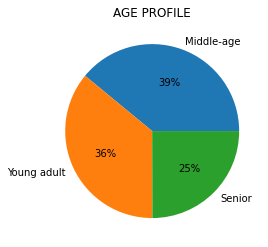

In [63]:
#create a pie chart of age variable
age_profile=df_merge_final['age_flag'].value_counts().plot.pie(title='AGE PROFILE',label='',autopct=('%1.f%%'))

In [64]:
# exporting the viz
age_profile=age_profile.figure.savefig(os.path.join(path,'04-Analysis','Visualization','age_profile.png'))

In [65]:
pd.options.display.max_rows = None

# Customer Profile by Age And Region

In [67]:
# creating a crosstab between Age and region
region_age=pd.crosstab(df_merge_final['region'],df_merge_final['age_flag'],dropna=False)

In [68]:
region_age

age_flag,Middle-age,Senior,Young adult
region,,,
Midwest,2337817,1492449,2138501
Northeast,1645410,1048366,1517749
South,3513621,2244420,3230756
Unknown,1386155,898343,1285506
West,3045037,1944703,2835410


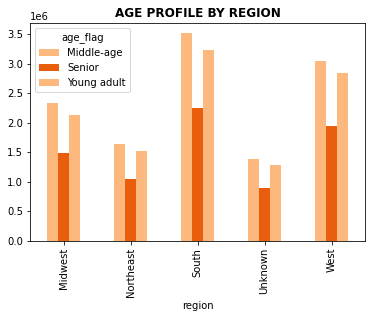

In [69]:
#creating bar chart
region_age_fig = region_age.plot.bar(color=sns.color_palette('Oranges',2))
plt.title('AGE PROFILE BY REGION',fontweight='bold')
plt.show()

In [70]:
# exporting the viz
region_age_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_age.png'))

In [71]:
# Age statistics
df_merge.groupby(['age_flag']).agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                   prices                
                               max       mean  min      max       mean  min
age_flag                                                                   
Middle-age                    30.0  11.153650  0.0  99999.0  12.003229  1.0
Senior                        30.0  11.122033  0.0  99999.0  11.817128  1.0
Young adult                   30.0  11.149739  0.0  99999.0  12.059559  1.0

# Customer Profile by Age And Department_id

In [72]:
# exporting the viz
region_age_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_age.png'))

In [73]:
# creating a crosstab between Age and Department
df_deptt_id_age=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['age_flag'],normalize='index')

In [74]:
df_deptt_id_age

age_flag,Middle-age,Senior,Young adult
department,,,
alcohol,0.387449,0.240248,0.372303
babies,0.396255,0.243375,0.360370
bakery,0.392446,0.248132,0.359422
beverages,0.392562,0.251287,0.356150
breakfast,0.392374,0.246459,0.361167
bulk,0.390467,0.249147,0.360386
canned goods,0.389344,0.248843,0.361812
dairy eggs,0.388987,0.249228,0.361785
deli,0.390807,0.249439,0.359754


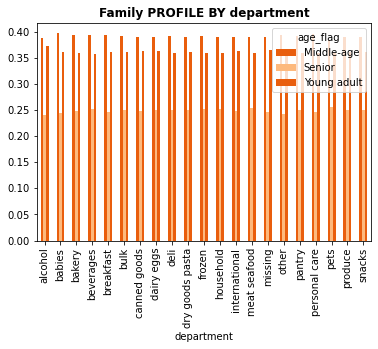

In [75]:
df_deptt_id_age.plot.bar(color=sns.color_palette('Oranges_r',2))
plt.title('Family PROFILE BY department',fontweight='bold')
plt.show()

# INCOME

In [76]:
#profiling based on income
df_merge_final.loc[df_merge_final['income']<=50000,'income_flag']='Low income'
df_merge_final.loc[(df_merge_final['income']>50000) & (df_merge_final['income']<=120000),'income_flag']='Middle income'
df_merge_final.loc[df_merge_final['income']>120000,'income_flag']='High income'

In [77]:
# Check frequencies of INCOME_flags for accuracy
df_merge_final['age_flag'].value_counts(dropna=False)

Middle-age     11928040
Young adult    11007922
Senior          7628281
Name: age_flag, dtype: int64

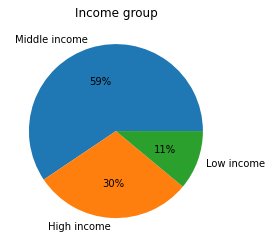

In [78]:
#create a pie chart of INCOME variable
income_profile=df_merge_final['income_flag'].value_counts().plot.pie(title='Income group',label='',autopct=('%1.f%%'))

In [79]:
# exporting the viz
income_profile=income_profile.figure.savefig(os.path.join(path,'04-Analysis','Visualization','income_profile.png'))

# Customer Profile by income And Region

In [80]:
# creating a crosstab between dependents and region
region_income=pd.crosstab(df_merge_final['region'],df_merge_final['income_flag'],dropna=False)

In [81]:
region_income

income_flag,High income,Low income,Middle income
region,,,
Midwest,1773747,649787,3545233
Northeast,1247966,469130,2494429
South,2659324,987353,5342120
Unknown,1063385,402289,2104330
West,2289707,861048,4674395


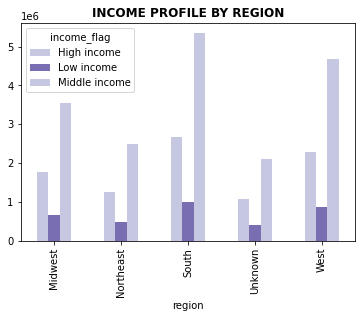

In [82]:
#creating bar chart
region_income_fig = region_income.plot.bar(color=sns.color_palette('Purples',2))
plt.title('INCOME PROFILE BY REGION',fontweight='bold')
plt.show()

In [83]:
# exporting the viz
region_income_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_income.png'))

In [84]:
# income statistics
df_merge_final.groupby(['income_flag']).agg({'days_since_prior_order':['max','mean','min'],'prices':['max','mean','min']})

days_since_prior_order                   prices                
                                 max       mean  min      max       mean  min
income_flag                                                                  
High income                     30.0  11.065565  0.0  99999.0  20.186593  1.0
Low income                      30.0  11.651906  0.0     25.0   6.698356  1.0
Middle income                   30.0  11.089369  0.0  99999.0   8.867956  1.0

# Customer Profile by income And Department_id

In [85]:
# exporting the viz
region_income_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_income.png'))

In [86]:
df_deptt_id_income=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['income_flag'],normalize='index')

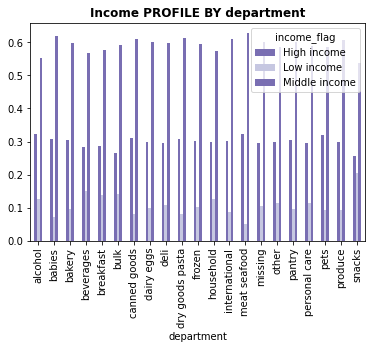

In [108]:
df_deptt_id_income.plot.bar(color=sns.color_palette('Purples_r',2))
plt.title('Income PROFILE BY department',fontweight='bold')
plt.show()

# DEPENDENTS

In [89]:
#profiling based on DEPENDENTS
df_merge_final.loc[df_merge_final['n_dependants']==0,'family_flag']='Single'
df_merge_final.loc[df_merge_final['n_dependants']>0,'family_flag']='Family'

In [90]:
# Check frequencies of age_flags for accuracy
df_merge_final['age_flag'].value_counts(dropna=False)

Middle-age     11928040
Young adult    11007922
Senior          7628281
Name: age_flag, dtype: int64

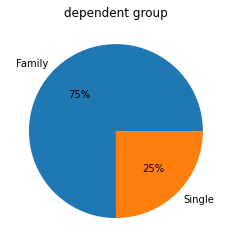

In [93]:
#create a pie chart of Dependent variable
dependent_profile=df_merge_final['family_flag'].value_counts().plot.pie(title='dependent group',label='',autopct=('%1.f%%'))

In [94]:
# exporting the viz
dependent_profile.figure.savefig(os.path.join(path,'04-Analysis','Visualization','dependent_profile.png'))

# Customer Profile by Dependent And Region

In [95]:
# creating a crosstab between dependents and region
region_dependent=pd.crosstab(df_merge_final['region'],df_merge_final['family_flag'],dropna=False)

In [96]:
region_dependent

family_flag,Family,Single
region,,
Midwest,4475204,1493563
Northeast,3162780,1048745
South,6733833,2254964
Unknown,2677652,892352
West,5876179,1948971


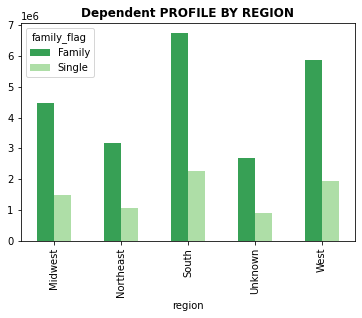

In [97]:
#creating bar chart
region_dependent_fig = region_dependent.plot.bar(color=sns.color_palette('Greens_r',2))
plt.title('Dependent PROFILE BY REGION',fontweight='bold')
plt.show()

In [101]:
# exporting the viz
region_dependent_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','region_dependent.png'))

In [102]:

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30564243 entries, 0 to 30564242
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   sex                     object  
 2   STATE                   object  
 3   age                     int64   
 4   date_joined             object  
 5   n_dependants            int64   
 6   fam_status              object  
 7   income                  int64   
 8   Unnamed: 0_x            float64 
 9   order_id                float64 
 10  order_number            float64 
 11  orders_day_of_week      float64 
 12  order_hour_of_day       float64 
 13  days_since_prior_order  float64 
 14  product_id              float64 
 15  add_to_cart_order       float64 
 16  reordered               float64 
 17  Unnamed: 0_y            float64 
 18  product_name            object  
 19  aisle_id                float64 
 20  department_id           float64 
 21  prices

In [104]:
# Dependent statistics
dependent_sums=df_merge_final.groupby(['family_flag']).agg({'days_since_prior_order':['max','mean'],'prices':['max','mean','sum']})

In [105]:
dependent_sums

days_since_prior_order              prices                        
                               max       mean      max       mean          sum
family_flag                                                                   
Family                        30.0  11.152132  99999.0  11.930153  271412959.5
Single                        30.0  11.120996  99999.0  12.117885   91849631.7

In [109]:
df_deptt_id_family=pd.crosstab(index=df_merge_final['department'],columns=df_merge_final['family_flag'],normalize='index')


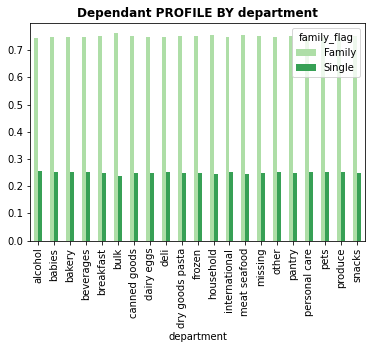

In [112]:
dependant_department_fig=df_deptt_id_family.plot.bar(color=sns.color_palette('Greens',2))
plt.title('Dependant PROFILE BY department',fontweight='bold')
plt.show()

In [113]:
# exporting the viz
dependant_department_fig.figure.savefig(os.path.join(path,'04-Analysis','Visualization','dependant_department.png'))

In [117]:
df_merge_final.to_pickle(os.path.join(path, '02-Data','Prepared-Data', 'Instacart_Basket_merged_final.pkl'))